# Hourly Visual Data

Importing Libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Loading Data

In [41]:
df = pd.read_csv('/content/hourly_stats.csv')

Basic Analysis

In [42]:
df.head(3)

,Id,ActivityDay,ActivityHour,Calories,TotalIntensity,AverageIntensity,StepTotal
0,1503960366,01-05-2016,00:00,64,9,0.150000,247
1,1503960366,01-05-2016,01:00,60,8,0.133333,59
2,1503960366,01-05-2016,02:00,50,2,0.033333,36


In [43]:
df.describe()

,Id,Calories,TotalIntensity,AverageIntensity,StepTotal
count,2.209900e+04,22099.000000,22099.000000,22099.000000,22099.000000
mean,4.848235e+09,97.386760,12.035341,0.200589,320.166342
std,2.422500e+09,60.702622,21.133110,0.352219,690.384228
min,1.503960e+09,42.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,63.000000,0.000000,0.000000,0.000000
50%,4.445115e+09,83.000000,3.000000,0.050000,40.000000
75%,6.962181e+09,108.000000,16.000000,0.266667,357.000000
max,8.877689e+09,948.000000,180.000000,3.000000,10554.000000


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                22099 non-null  int64  
 1   ActivityDay       22099 non-null  object 
 2   ActivityHour      22099 non-null  object 
 3   Calories          22099 non-null  int64  
 4   TotalIntensity    22099 non-null  int64  
 5   AverageIntensity  22099 non-null  float64
 6   StepTotal         22099 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 1.2+ MB


In [45]:
df['ActivityDay'] = pd.to_datetime(df['ActivityDay'])

<ipython-input-45-e86044d8827d>:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



checking for null values

In [46]:
df.isna().sum()

Id                  0
ActivityDay         0
ActivityHour        0
Calories            0
TotalIntensity      0
AverageIntensity    0
StepTotal           0
dtype: int64

In [47]:
df.columns

Index(['Id', 'ActivityDay', 'ActivityHour', 'Calories', 'TotalIntensity',
       'AverageIntensity', 'StepTotal'],
      dtype='object')

Giving The NAmes w.r.t the Unique ID's

In [48]:
df2 = pd.read_csv('/content/Indian-Female-Names.csv')

In [49]:
import pandas as pd
import random

names = df2['name'].unique()
assert len(names) >= 33, "You need at least 33 unique names in 'df2'."
selected_names = names[:33]
mapping_dict = dict(zip(df['Id'].unique(), selected_names))
df['Name'] = df['Id'].map(mapping_dict)
print(df.head())


           Id ActivityDay ActivityHour  Calories  TotalIntensity  \
0  1503960366  2016-01-05        00:00        64               9   
1  1503960366  2016-01-05        01:00        60               8   
2  1503960366  2016-01-05        02:00        50               2   
3  1503960366  2016-01-05        03:00        48               1   
4  1503960366  2016-01-05        04:00        47               0   

   AverageIntensity  StepTotal     Name  
0          0.150000        247  shivani  
1          0.133333         59  shivani  
2          0.033333         36  shivani  
3          0.016667          4  shivani  
4          0.000000          0  shivani  


In [50]:
# Reorder column names and add the 'Name' column after 'Id'
df = df[['Id', 'Name', 'ActivityDay', 'ActivityHour', 'Calories', 'TotalIntensity', 'AverageIntensity', 'StepTotal']]

In [51]:
df.head(2)

,Id,Name,ActivityDay,ActivityHour,Calories,TotalIntensity,AverageIntensity,StepTotal
0,1503960366,shivani,2016-01-05,00:00,64,9,0.150000,247
1,1503960366,shivani,2016-01-05,01:00,60,8,0.133333,59


In [52]:
daily_activity = df.groupby('ActivityDay').agg({'Calories': 'sum', 'StepTotal': 'sum'})


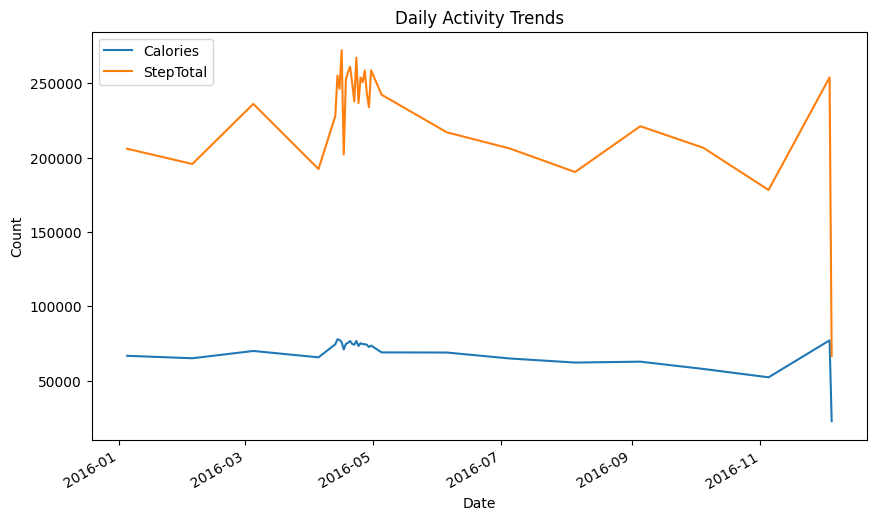

In [53]:
daily_activity.plot(y=['Calories', 'StepTotal'], figsize=(10, 6))
plt.title('Daily Activity Trends')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

In [55]:
df['DayOfWeek'] = df['ActivityDay'].dt.day_name()
weekday_vs_weekend = df.groupby('DayOfWeek').mean()[['Calories', 'StepTotal']]
print("Weekday vs. Weekend Activity:")
print(weekday_vs_weekend)


Weekday vs. Weekend Activity:
             Calories   StepTotal
DayOfWeek                        
Friday      96.406036  302.778326
Monday      97.119637  327.419142
Saturday   100.266763  348.806906
Sunday      96.007937  300.747685
Thursday    97.770172  327.498347
Tuesday     96.413822  308.688593
Wednesday   97.638085  328.491736


<ipython-input-55-d0e6909c541d>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [56]:
df['ActivityDay'] = pd.to_datetime(df['ActivityDay'])

# Extract day of the week
df['DayOfWeek'] = df['ActivityDay'].dt.day_name()

# Group by day of the week and calculate the mean for 'Calories'
avg_calories_by_day = df.groupby('DayOfWeek').mean()['Calories'].reset_index()

# Create bar chart using Plotly with custom colors
fig = px.bar(avg_calories_by_day, x='DayOfWeek', y='Calories', title='Average Calories by Day of the Week',
             color='DayOfWeek', color_discrete_map={'Monday': 'blue', 'Tuesday': 'green', 'Wednesday': 'orange',
                                                      'Thursday': 'red', 'Friday': 'purple', 'Saturday': 'brown',
                                                      'Sunday': 'pink'})
fig.show()

<ipython-input-56-d5aa4cb5fe10>:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



# Visualization


In [57]:
user_hourly_calories = df.groupby(['Name', 'ActivityHour'])['Calories'].sum()
top_users_hourly_calories = user_hourly_calories.groupby('Name').sum().sort_values(ascending=False).head(10)
top_users_hourly_calories_reset_index = top_users_hourly_calories.reset_index()
top_users_ids = top_users_hourly_calories_reset_index['Name'].astype(str)
top_users_calories = top_users_hourly_calories_reset_index['Calories']

fig = px.bar(x=top_users_ids, y=top_users_calories, color=top_users_ids,
             labels={'x': 'User ID', 'y': 'Total Calories Burnt per Hour'},
             title='Top Users by Calories Burnt per Hour')

fig.update_xaxes(tickangle=45, tickfont=dict(size=12), title_font=dict(size=14))
fig.update_yaxes(title_font=dict(size=14))
fig.update_layout(title_font=dict(size=18))
fig.show()

In [58]:
user_hourly_calories = df.groupby(['Name', 'ActivityHour'])['Calories'].sum()
bottom_users_hourly_calories = user_hourly_calories.groupby('Name').sum().sort_values(ascending=True).head(10)
bottom_users_hourly_calories_reset_index = bottom_users_hourly_calories.reset_index()
bottom_users_names = bottom_users_hourly_calories_reset_index['Name'].astype(str)
bottom_users_calories = bottom_users_hourly_calories_reset_index['Calories']

fig = px.bar(x=bottom_users_names, y=bottom_users_calories, color=bottom_users_names,
             labels={'x': 'User ID', 'y': 'Total Calories Burnt per Hour'},
             title='Bottom Users by Calories Burnt per Hour')

fig.update_xaxes(tickangle=45, tickfont=dict(size=12), title_font=dict(size=14))
fig.update_yaxes(title_font=dict(size=14))
fig.update_layout(title_font=dict(size=18))
fig.show()


In [59]:
user_total_steps = df.groupby('Name')['StepTotal'].sum()
top_users_steps = user_total_steps.sort_values(ascending=False).head(10)
top_users_steps_reset_index = top_users_steps.reset_index()
top_users_names = top_users_steps_reset_index['Name'].astype(str)

user_hourly_calories = df.groupby(['Name', 'ActivityHour'])['Calories'].sum()
top_users_hourly_calories = user_hourly_calories.groupby('Name').sum().sort_values(ascending=False).head(10)
top_users_hourly_calories_reset_index = top_users_hourly_calories.reset_index()
top_users_ids = top_users_hourly_calories_reset_index['Name'].astype(str)
top_users_calories = top_users_hourly_calories_reset_index['Calories']

fig = px.bar(x=top_users_names, y=top_users_steps, color=top_users_names,
             labels={'x': 'User ID', 'y': 'StepTotal'},
             title='Top Users by Total Steps')

fig.update_xaxes(tickangle=45, tickfont=dict(size=12), title_font=dict(size=14))
fig.update_yaxes(title_font=dict(size=14))
fig.update_layout(title_font=dict(size=18))
fig.show()

fig = px.bar(x=top_users_ids, y=top_users_calories, color=top_users_ids,
             labels={'x': 'User ID', 'y': 'Total Calories Burnt per Hour'},
             title='Top Users by Calories Burnt per Hour')

fig.update_xaxes(tickangle=45, tickfont=dict(size=12), title_font=dict(size=14))
fig.update_yaxes(title_font=dict(size=14))
fig.update_layout(title_font=dict(size=18))
fig.show()


In [60]:
import plotly.express as px

# Define a colorscale with red colors
color_scale = [[0, 'rgb(255, 255, 255)'], [1, 'rgb(255, 0, 0)']]

# Create the heatmap using Plotly Express
fig = px.imshow(df.pivot_table(index='ActivityDay', columns='ActivityHour', values='Calories'),
                labels=dict(color='Total Calories'),
                color_continuous_scale=color_scale,
                title='Heatmap of Total Calories per Day and Hour',
                x=['00:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00',
                   '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00',
                   '20:00', '21:00', '22:00', '23:00'])

# Customize the axis titles and font
fig.update_xaxes(title_text='Hour', tickfont=dict(size=12))
fig.update_yaxes(title_text='Date', tickfont=dict(size=12))
fig.update_layout(title_font=dict(size=18, family='Arial', color='black'))

# Show the plot
fig.show()


In [61]:
import plotly.express as px

# Create a pair plot using Plotly Express
fig = px.scatter_matrix(df, dimensions=['Calories', 'TotalIntensity', 'StepTotal'],
                        title='Pair Plot of Fitness Tracker Metrics',
                        labels={'Calories': 'Calories', 'TotalIntensity': 'Total Intensity',
                                'StepTotal': 'Step Total'},
                        color_discrete_sequence=['green'])

# Update layout for a more attractive appearance
fig.update_layout(
    title_font=dict(size=20, family='Arial', color='black'),
    font=dict(family='Arial', size=12, color='black'),
    plot_bgcolor='white',       # Background color
    paper_bgcolor='white',      # Plot area background color
)

# Show the generated pair plot
fig.show()


In [62]:
import plotly.express as px

# Create a scatter plot using Plotly Express
fig = px.scatter(df, x='StepTotal', y='Calories', title='Scatter Plot: Step Total vs Calories',
                 labels={'StepTotal': 'Step Total', 'Calories': 'Calories'},
                 color_discrete_sequence=['#FF5733'])

# Update layout for a more attractive appearance
fig.update_layout(
    title_font=dict(size=20, family='Arial', color='black'),
    font=dict(family='Arial', size=12, color='black'),
    plot_bgcolor='white',       # Background color
    paper_bgcolor='white',      # Plot area background color
)

# Show the generated scatter plot
fig.show()


In [63]:
import plotly.express as px

# Create a scatter plot using Plotly Express
fig = px.scatter(df, x='StepTotal', y='TotalIntensity', title='Scatter Plot: Step Total vs Intensity',
                 labels={'StepTotal': 'Step Total', 'TotalIntensity': 'Total Intensity'},
                 color_discrete_sequence=['#800080'])

# Update layout for a more attractive appearance
fig.update_layout(
    title_font=dict(size=20, family='Arial', color='black'),
    font=dict(family='Arial', size=12, color='black'),
    plot_bgcolor='white',       # Background color
    paper_bgcolor='white',      # Plot area background color
)

# Show the generated scatter plot
fig.show()


In [64]:
import plotly.express as px

# Create a heatmap using Plotly Express with red color scale
fig = px.imshow(df.pivot_table(index='ActivityDay', columns='ActivityHour', values='StepTotal'),
                labels=dict(color='Total Steps'),
                color_continuous_scale='reds',
                title='Heatmap of Total Steps per Day and Hour',
                x=['00:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00',
                   '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00',
                   '20:00', '21:00', '22:00', '23:00'])

# Customize the axis titles
fig.update_xaxes(title_text='Hour')
fig.update_yaxes(title_text='Date')

# Show the generated heatmap
fig.show()


In [68]:
df['DayOfWeek'] = df['ActivityDay'].dt.day_name()

# Group by day of the week and calculate the sum for 'Calories' and 'StepTotal'
sum_calories_steps_by_day = df.groupby('DayOfWeek').sum()['Calories'].reset_index()

# Create pie chart for 'Calories' by day of the week
fig_calories = px.pie(sum_calories_steps_by_day, values='Calories', names='DayOfWeek', title='Calories Distribution by Day of the Week')

# Display pie charts
fig_calories.show()



<ipython-input-68-100e903f0546>:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [70]:
df['DayOfWeek'] = df['ActivityDay'].dt.day_name()

fig_calories = px.violin(df, x='DayOfWeek', y='Calories', title='Calories Distribution by Day of the Week',
                         box=True, points="all", hover_data=df.columns)
fig_calories.show()
